In [58]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import imghdr
import numpy as np

In [59]:
data_dir='data'
image_exts = ['jpeg','jpg', 'bmp', 'png']


In [60]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))

In [61]:
data=tf.keras.utils.image_dataset_from_directory('data')

Found 179 files belonging to 2 classes.


In [62]:
data_iterator=data.as_numpy_iterator()


In [63]:
batch=data_iterator.next()

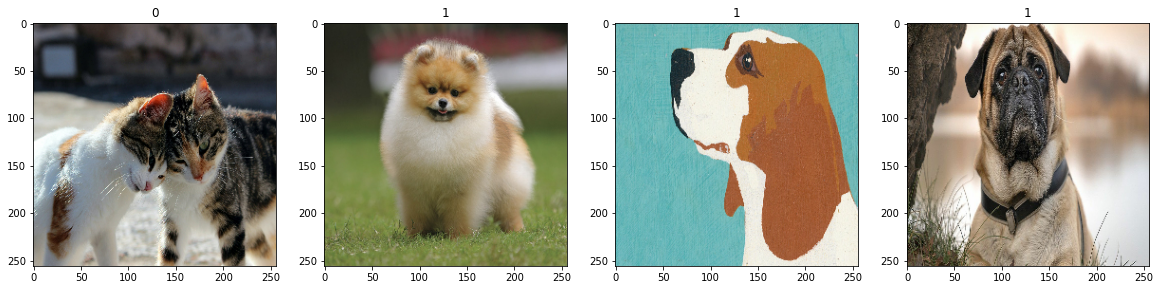

In [64]:

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [65]:
batch[0].shape

(32, 256, 256, 3)

In [66]:

data=data.map(lambda x,y: (x/255,y))

In [67]:
data.as_numpy_iterator().next()

(array([[[[0.09411765, 0.09411765, 0.09411765],
          [0.09411765, 0.09411765, 0.09411765],
          [0.10196079, 0.10196079, 0.10196079],
          ...,
          [0.01568628, 0.01568628, 0.01568628],
          [0.01568628, 0.01568628, 0.01568628],
          [0.01568628, 0.01568628, 0.01568628]],
 
         [[0.09411765, 0.09411765, 0.09411765],
          [0.09411765, 0.09411765, 0.09411765],
          [0.10196079, 0.10196079, 0.10196079],
          ...,
          [0.01568628, 0.01568628, 0.01568628],
          [0.01568628, 0.01568628, 0.01568628],
          [0.01568628, 0.01568628, 0.01568628]],
 
         [[0.09411765, 0.09411765, 0.09411765],
          [0.09411765, 0.09411765, 0.09411765],
          [0.10196079, 0.10196079, 0.10196079],
          ...,
          [0.01568628, 0.01568628, 0.01568628],
          [0.01568628, 0.01568628, 0.01568628],
          [0.01568628, 0.01568628, 0.01568628]],
 
         ...,
 
         [[0.24313726, 0.1882353 , 0.15294118],
          [0.24313

In [68]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [69]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

In [70]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [71]:
model=Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [72]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 16)      

In [73]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [74]:

hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
4/4 [==============================] - 9s 2s/step - loss: 0.9622 - accuracy: 0.4297 - val_loss: 0.7469 - val_accuracy: 0.4062
Epoch 2/20
4/4 [==============================] - 7s 1s/step - loss: 0.6947 - accuracy: 0.5000 - val_loss: 0.6737 - val_accuracy: 0.6562
Epoch 3/20
4/4 [==============================] - 10s 2s/step - loss: 0.6620 - accuracy: 0.6484 - val_loss: 0.6524 - val_accuracy: 0.6250
Epoch 4/20
4/4 [==============================] - 9s 2s/step - loss: 0.6267 - accuracy: 0.7344 - val_loss: 0.5952 - val_accuracy: 0.8750
Epoch 5/20
4/4 [==============================] - 9s 2s/step - loss: 0.5447 - accuracy: 0.8047 - val_loss: 0.5092 - val_accuracy: 0.8125
Epoch 6/20
4/4 [==============================] - 8s 2s/step - loss: 0.4896 - accuracy: 0.7891 - val_loss: 0.5090 - val_accuracy: 0.6875
Epoch 7/20
4/4 [==============================] - 9s 2s/step - loss: 0.4318 - accuracy: 0.7734 - val_loss: 0.3438 - val_accuracy: 0.8438
Epoch 8/20
4/4 [========================

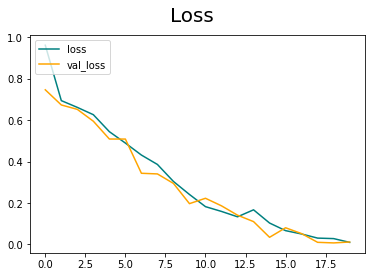

In [75]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

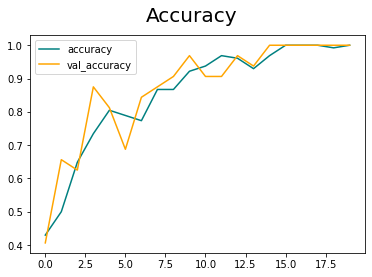

In [76]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [77]:
from tensorflow.keras.metrics import Recall,Precision,BinaryAccuracy

In [78]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [79]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 362ms/step


In [82]:

print(f'recall:{re.result()}, precison :{pre.result()}, accuracy :{acc.result()}')

recall:1.0, precison :1.0, accuracy :1.0


In [83]:
model.save(os.path.join('model','cat_dog.h5'))